# **Facial Recognition - Capstone**



# Imports

---



In [ ]:
!pip install face_recognition

import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import face_recognition
import matplotlib.patches as patches
import tensorflow as tf
import random
import seaborn as sns
from google.colab import drive
from tensorflow import keras
from keras import datasets, models, layers
from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import display, Javascript, Image, YouTubeVideo
from google.colab.output import eval_js
from base64 import b64decode
from numpy import asarray

     |████████████████████████████████| 100.1 MB 14 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=55137d5f2dacbacf00e431cf445c237ef37648cf768591e069521566fda469fd
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


#Exploratory Data Analysis

---



##Creating array with video filepaths

In [ ]:
path='drive/MyDrive/data/'

# Create an array with all the video filepaths
videos = []
for file in os.listdir(path):
    video = path + file
    videos.append(video)

print(videos)


##Frames in shortest video

In [ ]:
# Figure out how many frames the shortest video has

min = 99999
for idx in range(len(videos)):
  input_video = cv.VideoCapture(videos[idx])
  total_frames = int(input_video.get(cv.CAP_PROP_FRAME_COUNT))
  if total_frames < min:
    min = total_frames

print(min)

146


##Creating array of images

In [ ]:
X_train = []
X_test = []
for video in videos:
  input_video = cv.VideoCapture(video)

  height = int(input_video.get(cv.CAP_PROP_FRAME_HEIGHT))
  width = int(input_video.get(cv.CAP_PROP_FRAME_WIDTH))
  fps = input_video.get(cv.CAP_PROP_FPS)
  total_frames = int(input_video.get(cv.CAP_PROP_FRAME_COUNT))

  train_data = []
  test_data = []

  for frame_idx in range(0, 140, 10):
    input_video.set(cv.CAP_PROP_POS_FRAMES, frame_idx)
    ret, frame = input_video.read()
    if not ret:
      raise Exception("Problem reading frame", frame_idx, " from video")
    if frame_idx < 110:
      train_data.append(frame)
    else:
      test_data.append(frame)

  X_train.append(train_data)
  X_test.append(test_data)

  input_video.release()

##Plotting the Data

Let's see how the data looks

(1080, 1920, 3)


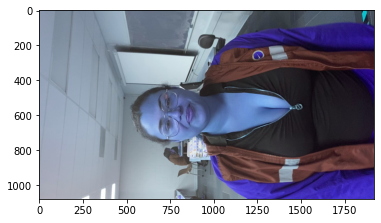

In [ ]:
plt.imshow(X_train[0][0])
print(np.array(X_train[0][0]).shape)

As you can see, it's sideways, the colors are off, and the resolution is really high. Lets fix that.

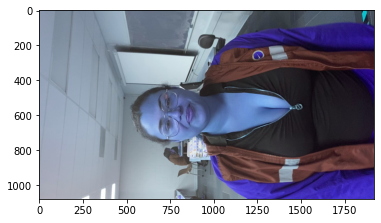

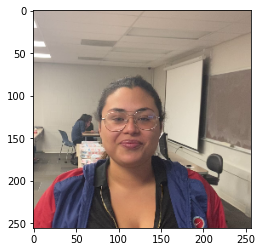

In [ ]:
def fixImg(img, rotate = True, crop = True):
  new_img = img[:,:,::-1] # Color correction
  if crop:
    new_img = new_img[:,200:1280,:] # Cropping
  new_img = cv.resize(new_img, (256,256)) # Resizing
  if rotate:
    new_img = cv.rotate(new_img, cv.cv2.ROTATE_90_CLOCKWISE) # Rotation
  return new_img

im = X_train[0][0]

plt.imshow(im)
plt.show()
plt.imshow(fixImg(im))
plt.show()

#Recognizing Faces

---



Using the repo provided, our first goal was to implement a system that can simply identify every face in an image. We've demonstrated this below with the 'draw_boxes_on_faces' function, that can easily be modified to suit our needs.

##Draw boxes

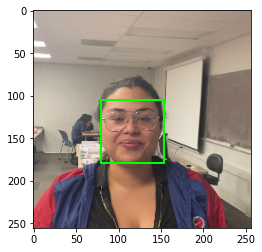

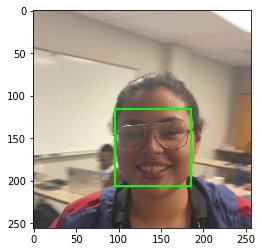

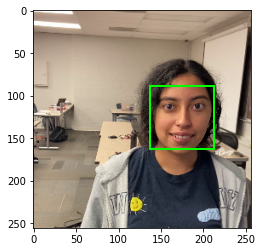

In [ ]:
personA1 = fixImg(X_train[0][0])
personA2 = fixImg(X_train[0][10])
personB = fixImg(X_train[1][0])

def draw_boxes_on_faces(img):
    face_locations = face_recognition.face_locations(img)
    fig, ax = plt.subplots()
    plt.imshow(img)
    for face_location in face_locations:
        top, right, bottom, left = face_location
        rect = patches.Rectangle((left, bottom), right - left, top - bottom, linewidth=2, 
                                 edgecolor='lime', facecolor='none')
        ax.add_patch(rect)
    plt.show()

draw_boxes_on_faces(personA1)
draw_boxes_on_faces(personA2)
draw_boxes_on_faces(fixImg(X_train[5][0]))

##Identifying People



Now that we're successfully locating faces, we can showcase the libraries built in indentification model to start identifying the people in this image. For this example, I'm just encoding a picture of each of my classmates and testing it by feeding it a picture of another of my classmates. The output is an array of booleans, one for each possible person that the target could be.

In [ ]:
unknown_person = fixImg(X_train[12][0])
personA = fixImg(X_train[0][10])
personB = fixImg(X_train[1][0])
personC = fixImg(X_train[2][0])
personD = fixImg(X_train[3][0])
personE = fixImg(X_train[4][0])
personF = fixImg(X_train[5][0])
personG = fixImg(X_train[6][0])
personH = fixImg(X_train[7][0])
personI = fixImg(X_train[8][0])
personJ = fixImg(X_train[9][0])
personK = fixImg(X_train[10][0])
personL = fixImg(X_train[11][0])
personM = fixImg(X_train[12][0])
personN = fixImg(X_train[13][0])
personO = fixImg(X_train[14][0])
personP = fixImg(X_train[15][0])
personQ = fixImg(X_train[16][0])
personR = fixImg(X_train[17][0])
personS = fixImg(X_train[18][0])
personT = fixImg(X_train[19][0])
personU = fixImg(X_train[20][0])

def face_identification():
    try:
        unknown_face_encoding = face_recognition.face_encodings(unknown_person)[0]
        A_face_encoding = face_recognition.face_encodings(personA)[0]
        B_face_encoding = face_recognition.face_encodings(personB)[0]
        C_face_encoding = face_recognition.face_encodings(personC)[0]
        D_face_encoding = face_recognition.face_encodings(personD)[0]
        E_face_encoding = face_recognition.face_encodings(personE)[0]
        F_face_encoding = face_recognition.face_encodings(personF)[0]
        G_face_encoding = face_recognition.face_encodings(personG)[0]
        H_face_encoding = face_recognition.face_encodings(personH)[0]
        I_face_encoding = face_recognition.face_encodings(personI)[0]
        J_face_encoding = face_recognition.face_encodings(personJ)[0]
        K_face_encoding = face_recognition.face_encodings(personK)[0]
        L_face_encoding = face_recognition.face_encodings(personL)[0]
        M_face_encoding = face_recognition.face_encodings(personM)[0]
        N_face_encoding = face_recognition.face_encodings(personN)[0]
        O_face_encoding = face_recognition.face_encodings(personO)[0]
        P_face_encoding = face_recognition.face_encodings(personP)[0]
        Q_face_encoding = face_recognition.face_encodings(personQ)[0]
        R_face_encoding = face_recognition.face_encodings(personR)[0]
        S_face_encoding = face_recognition.face_encodings(personS)[0]
        T_face_encoding = face_recognition.face_encodings(personT)[0]
        U_face_encoding = face_recognition.face_encodings(personU)[0]
        
    except IndexError:
        print("I wasn't able to locate any faces in at least one of the images. Check the image files. Aborting...")
        quit()

    known_faces = [
        A_face_encoding,
        B_face_encoding,
        C_face_encoding,
        D_face_encoding,
        E_face_encoding,
        F_face_encoding,
        G_face_encoding,
        H_face_encoding,
        I_face_encoding,
        J_face_encoding,
        K_face_encoding,
        L_face_encoding,
        M_face_encoding,
        N_face_encoding,
        O_face_encoding,
        P_face_encoding,
        Q_face_encoding,
        R_face_encoding,
        S_face_encoding,
        T_face_encoding,
        U_face_encoding
    ]

    # results is an array of True/False telling if the unknown face matched anyone in the known_faces array
    results = face_recognition.compare_faces(known_faces, unknown_face_encoding)

    return results

results = face_identification()
print(results)

[False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False]


[False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False]


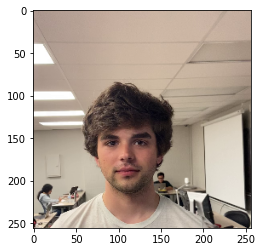

In [ ]:
print(results)
for idx, result in enumerate(results):
  if result:
    plt.imshow(fixImg(X_train[idx][0]))
    plt.show()

#Facial Detection From Webcam

---



In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  print(data)
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>


Saved to photo.jpg

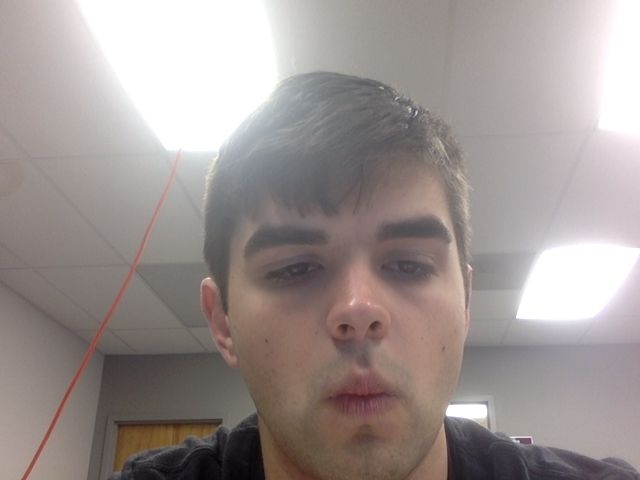

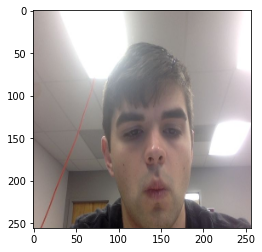

In [ ]:
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  im = cv.imread('photo.jpg')
  draw_boxes_on_faces(fixImg(im, rotate = False, crop = False))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

#Facial Indentification From Webcam

---

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  print(data)
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
unknown_person = fixImg(X_train[12][0])
personA = fixImg(X_train[0][10])
personB = fixImg(X_train[1][0])
personC = fixImg(X_train[2][0])
personD = fixImg(X_train[3][0])
personE = fixImg(X_train[4][0])
personF = fixImg(X_train[5][0])
personG = fixImg(X_train[6][0])
personH = fixImg(X_train[7][0])
personI = fixImg(X_train[8][0])
personJ = fixImg(X_train[9][0])
personK = fixImg(X_train[10][0])
personL = fixImg(X_train[11][0])
personM = fixImg(X_train[12][0])
personN = fixImg(X_train[13][0])
personO = fixImg(X_train[14][0])
personP = fixImg(X_train[15][0])
personQ = fixImg(X_train[16][0])
personR = fixImg(X_train[17][0])
personS = fixImg(X_train[18][0])
personT = fixImg(X_train[19][0])
personU = fixImg(X_train[20][0])

def face_identification(unknown):
    try:
        unknown_face_encoding = face_recognition.face_encodings(unknown)[0]
        A_face_encoding = face_recognition.face_encodings(personA)[0]
        B_face_encoding = face_recognition.face_encodings(personB)[0]
        C_face_encoding = face_recognition.face_encodings(personC)[0]
        D_face_encoding = face_recognition.face_encodings(personD)[0]
        E_face_encoding = face_recognition.face_encodings(personE)[0]
        F_face_encoding = face_recognition.face_encodings(personF)[0]
        G_face_encoding = face_recognition.face_encodings(personG)[0]
        H_face_encoding = face_recognition.face_encodings(personH)[0]
        I_face_encoding = face_recognition.face_encodings(personI)[0]
        J_face_encoding = face_recognition.face_encodings(personJ)[0]
        K_face_encoding = face_recognition.face_encodings(personK)[0]
        L_face_encoding = face_recognition.face_encodings(personL)[0]
        M_face_encoding = face_recognition.face_encodings(personM)[0]
        N_face_encoding = face_recognition.face_encodings(personN)[0]
        O_face_encoding = face_recognition.face_encodings(personO)[0]
        P_face_encoding = face_recognition.face_encodings(personP)[0]
        Q_face_encoding = face_recognition.face_encodings(personQ)[0]
        R_face_encoding = face_recognition.face_encodings(personR)[0]
        S_face_encoding = face_recognition.face_encodings(personS)[0]
        T_face_encoding = face_recognition.face_encodings(personT)[0]
        U_face_encoding = face_recognition.face_encodings(personU)[0]
        
    except IndexError:
        print("I wasn't able to locate any faces in at least one of the images. Check the image files. Aborting...")
        quit()

    known_faces = [
        A_face_encoding,
        B_face_encoding,
        C_face_encoding,
        D_face_encoding,
        E_face_encoding,
        F_face_encoding,
        G_face_encoding,
        H_face_encoding,
        I_face_encoding,
        J_face_encoding,
        K_face_encoding,
        L_face_encoding,
        M_face_encoding,
        N_face_encoding,
        O_face_encoding,
        P_face_encoding,
        Q_face_encoding,
        R_face_encoding,
        S_face_encoding,
        T_face_encoding,
        U_face_encoding
    ]

    # results is an array of True/False telling if the unknown face matched anyone in the known_faces array
    results = face_recognition.compare_faces(known_faces, unknown_face_encoding)

    # Let's use make these results easier to understand
    classmates = ['Elayne', 'Alejandra', 'Greg', "A'Darius", 'Danny', 'Maria', 
              'Lizbet', 'Giancarlos', 'Julio', 'Abraham', 'Alexis', 'Claudia', 
              'Sam', 'Jonathan', 'Ron', "N'Kira", 'Jose', 'Trinity', 'Wren', 
              'Steve', 'Marvin']
    results = [_ for idx, _ in enumerate(classmates) if results[idx]]
    

    return results

results = face_identification(unknown_person)
print(results)


['Sam']


<IPython.core.display.Javascript object>


Saved to photo.jpg
['Sam']

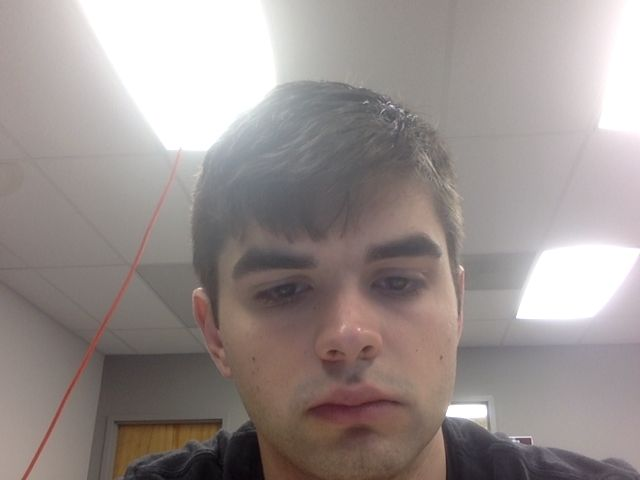

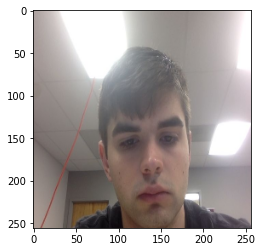

In [ ]:

try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  im = cv.imread('photo.jpg')
  plt.imshow(fixImg(im, rotate = False, crop = False))
  print(face_identification(im))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Cropping to Only Detected Face

---

Instead of dealing with the whole image, it would probably be wise to just crop the face out and feed that into our network. Here I define a function that does exactly that, and a new fixImg function that doesn't do any resizing.

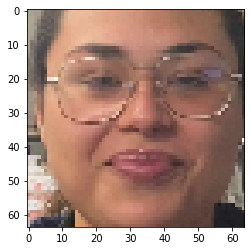

In [ ]:
def fixImg(img, rotate = True):
  img = img[:,:,::-1] # Color correction
  if rotate:
    img = cv.rotate(img, cv.cv2.ROTATE_90_CLOCKWISE) # Rotation
  return img

def crop_to_face(img):
    face_locations = face_recognition.face_locations(img)
    output_imgs = []
    for face_location in face_locations:
        top, right, bottom, left = face_location
        new_img = img[top:bottom,left:right,:] # Cropping
        new_img = cv.resize(new_img, (64,64)) # Resizing
        output_imgs.append(new_img)
    return output_imgs

plt.imshow(crop_to_face(fixImg(X_train[0][0]))[0])

Now, let's see if we can identify people from webcam footage using this new method.

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  print(data)
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
unknown_person = crop_to_face(fixImg(X_train[12][0]))[0]
personA = crop_to_face(fixImg(X_train[0][10]))[0]
personB = crop_to_face(fixImg(X_train[1][0]))[0]
personC = crop_to_face(fixImg(X_train[2][0]))[0]
personD = crop_to_face(fixImg(X_train[3][0]))[0]
personE = crop_to_face(fixImg(X_train[4][0]))[0]
personF = crop_to_face(fixImg(X_train[5][0]))[0]
personG = crop_to_face(fixImg(X_train[6][0]))[0]
personH = crop_to_face(fixImg(X_train[7][0]))[0]
personI = crop_to_face(fixImg(X_train[8][0]))[0]
personJ = crop_to_face(fixImg(X_train[9][0]))[0]
personK = crop_to_face(fixImg(X_train[10][0]))[0]
personL = crop_to_face(fixImg(X_train[11][0]))[0]
personM = crop_to_face(fixImg(X_train[12][0]))[0]
personN = crop_to_face(fixImg(X_train[13][0]))[0]
personO = crop_to_face(fixImg(X_train[14][0]))[0]
personP = crop_to_face(fixImg(X_train[15][0]))[0]
personQ = crop_to_face(fixImg(X_train[16][0]))[0]
personR = crop_to_face(fixImg(X_train[17][0]))[0]
personS = crop_to_face(fixImg(X_train[18][0]))[0]
personT = crop_to_face(fixImg(X_train[19][0]))[0]
personU = crop_to_face(fixImg(X_train[20][0]))[0]

def face_identification(unknown):
    try:
        unknown_face_encoding = face_recognition.face_encodings(unknown)[0]
        A_face_encoding = face_recognition.face_encodings(personA)[0]
        B_face_encoding = face_recognition.face_encodings(personB)[0]
        C_face_encoding = face_recognition.face_encodings(personC)[0]
        D_face_encoding = face_recognition.face_encodings(personA)[0]
        E_face_encoding = face_recognition.face_encodings(personE)[0]
        F_face_encoding = face_recognition.face_encodings(personF)[0]
        G_face_encoding = face_recognition.face_encodings(personG)[0]
        H_face_encoding = face_recognition.face_encodings(personH)[0]
        I_face_encoding = face_recognition.face_encodings(personI)[0]
        J_face_encoding = face_recognition.face_encodings(personJ)[0]
        K_face_encoding = face_recognition.face_encodings(personK)[0]
        L_face_encoding = face_recognition.face_encodings(personL)[0]
        M_face_encoding = face_recognition.face_encodings(personM)[0]
        N_face_encoding = face_recognition.face_encodings(personN)[0]
        O_face_encoding = face_recognition.face_encodings(personO)[0]
        P_face_encoding = face_recognition.face_encodings(personP)[0]
        Q_face_encoding = face_recognition.face_encodings(personQ)[0]
        R_face_encoding = face_recognition.face_encodings(personR)[0]
        S_face_encoding = face_recognition.face_encodings(personS)[0]
        T_face_encoding = face_recognition.face_encodings(personT)[0]
        U_face_encoding = face_recognition.face_encodings(personU)[0]
        
    except IndexError:
        print("I wasn't able to locate any faces in at least one of the images. Check the image files. Aborting...")
        return

    known_faces = [
        A_face_encoding,
        B_face_encoding,
        C_face_encoding,
        D_face_encoding,
        E_face_encoding,
        F_face_encoding,
        G_face_encoding,
        H_face_encoding,
        I_face_encoding,
        J_face_encoding,
        K_face_encoding,
        L_face_encoding,
        M_face_encoding,
        N_face_encoding,
        O_face_encoding,
        P_face_encoding,
        Q_face_encoding,
        R_face_encoding,
        S_face_encoding,
        T_face_encoding,
        U_face_encoding
    ]

    # results is an array of True/False telling if the unknown face matched anyone in the known_faces array
    results = face_recognition.compare_faces(known_faces, unknown_face_encoding)

    # Let's use make these results easier to understand
    classmates = ['Elayne', 'Alejandra', 'Greg', "A'Darius", 'Danny', 'Maria', 
              'Lizbet', 'Giancarlos', 'Julio', 'Abraham', 'Alexis', 'Claudia', 
              'Sam', 'Jonathan', 'Ron', "N'Kira", 'Jose', 'Trinity', 'Wren', 
              'Steve', 'Marvin']
    results = [_ for idx, _ in enumerate(classmates) if results[idx]]
    

    return results

results = face_identification(unknown_person)
print(results)

['Sam']


<IPython.core.display.Javascript object>


Saved to photo.jpg
['Sam']

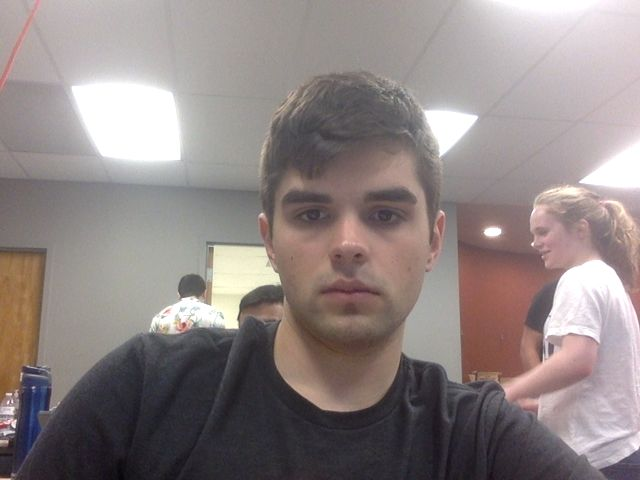

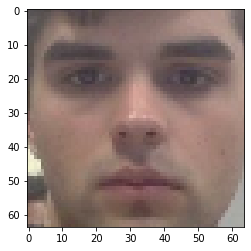

In [ ]:

try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  im = cv.imread('photo.jpg')
  faces = crop_to_face(fixImg(im, rotate=False))
  for face in faces:
    print(face_identification(face))
    plt.imshow(face)
    plt.show()
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Creating a model from scratch

---

Up until now, we've been using the built in facial encodings from the facial_recognition library to identify people. Now, we're going to try making our own model to do it from scratch.

The input will be a 64x64 image of someone's face, and the output will be one of 21 classes, each correspond to one of our classmates.

##Organizing Data

For convience, I'm going to paste some earlier code to load the dataset.

In [ ]:
# Helper functions
def fixImg(img, rotate = True):
  img = img[:,:,::-1] # Color correction
  if rotate:
    img = cv.rotate(img, cv.cv2.ROTATE_90_CLOCKWISE) # Rotation
  return img

def crop_to_face(img):
    face_locations = face_recognition.face_locations(img)
    output_imgs = []
    for face_location in face_locations:
        top, right, bottom, left = face_location
        new_img = img[top:bottom,left:right,:] # Cropping
        new_img = cv.resize(new_img, (64,64)) # Resizing
        output_imgs.append(new_img)
    return output_imgs

In [ ]:
# Mount to google drive
drive.mount('/content/drive')

# Create an array with all the video filepaths
path='drive/MyDrive/data/'
videos = []
for file in os.listdir(path):
    video = path + file
    videos.append(video)

# Create feature array full of images
X_train = []
y_train = []
X_test = []
y_test = []
for student_idx, video in enumerate(videos):
  input_video = cv.VideoCapture(video)

  height = int(input_video.get(cv.CAP_PROP_FRAME_HEIGHT))
  width = int(input_video.get(cv.CAP_PROP_FRAME_WIDTH))
  fps = input_video.get(cv.CAP_PROP_FPS)
  total_frames = int(input_video.get(cv.CAP_PROP_FRAME_COUNT))

  for frame_idx in range(0, 140, 70):
    input_video.set(cv.CAP_PROP_POS_FRAMES, frame_idx)
    ret, frame = input_video.read()
    if not ret:
      raise Exception("Problem reading frame", frame_idx, " from video")
    faces = crop_to_face(fixImg(frame))
    if len(faces) == 1: # Only use a frame if there is exactly 1 face detected
      if frame_idx % 5 == 0:
        X_test.append(faces[0])
        y_test.append(student_idx)
      else:
        X_train.append(faces[0])
        y_train.append(student_idx)
  print(student_idx)
  input_video.release()

Mounted at /content/drive
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


Now, I'm going to take these feature images and crop them to be just 64x64 images of the individual faces. I'm also going to split them into training and testing sets.

One hot encoding the labels so that tensorflow can use them.

In [ ]:
X_train = np.array(X_train)
y_train = np.array([[0] * _ + [1] + [0] * (21 - _ - 1)  for _ in y_train])
X_test = np.array(X_test)
y_test = np.array([[0] * _ + [1] + [0] * (21 - _ - 1) for _ in y_test])
X_train = X_test # temp
y_train = y_test # temp
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(40, 64, 64, 3) (40, 21) (40, 64, 64, 3) (40, 21)


##Building a Model

Now that we've got our data in a nice, clean format, we're ready to build our model.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu',
                           input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(21, activation='softmax')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=10,
)

# Calling `save('my_model')` creates a SavedModel folder `my_model`.
model.save("drive/MyDrive/my_model_from_colab")


Epoch 1/10
68/68 [==============================] - 1s 8ms/step - loss: 0.7917 - accuracy: 0.4949
Epoch 2/10
68/68 [==============================] - 0s 5ms/step - loss: 0.0211 - accuracy: 0.9605
Epoch 3/10
68/68 [==============================] - 0s 5ms/step - loss: 0.0057 - accuracy: 0.9981
Epoch 4/10
68/68 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 0.9986
Epoch 5/10
68/68 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 0.9991
Epoch 6/10
68/68 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9958
Epoch 7/10
68/68 [==============================] - 0s 5ms/step - loss: 0.0046 - accuracy: 0.9963
Epoch 8/10
68/68 [==============================] - 0s 5ms/step - loss: 0.0030 - accuracy: 0.9986
Epoch 9/10
68/68 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 10/10
68/68 [==============================] - 0s 5ms/step - loss: 0.0022 - accuracy: 0.9986
INFO:tensorflow:Ass

##Load saved model from file

Loading the model for when you don't want to re-train it

In [ ]:
# It can be used to reconstruct the model identically.
model = keras.models.load_model("drive/MyDrive/my_model_from_colab")

Let's evaluate our model and make a sample prediction.

17/17 [==============================] - 0s 4ms/step - loss: 0.0152 - accuracy: 0.9814


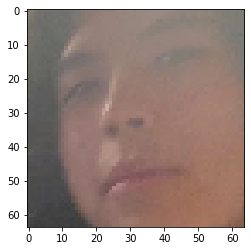

Prediction: Abraham
Actual: Abraham

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.96      0.98        26
           2       1.00      1.00      1.00        27
           3       1.00      0.95      0.97        20
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        28
           7       0.93      0.96      0.95        27
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        27
          10       0.96      0.96      0.96        23
          11       1.00      1.00      1.00        27
          12       1.00      1.00      1.00        26
          13       0.85      1.00      0.92        28
          14       0.96      0.96      0.96        28
          15       1.00      1.00      1.00        24
          16       1.

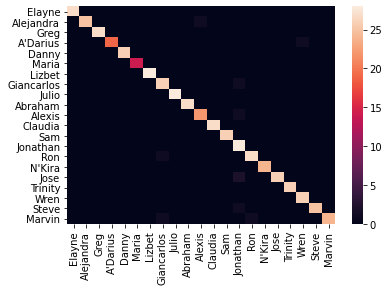

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1)

num = random.randint(0, len(y_test)-1)

plt.imshow(X_test[num])
plt.show()
predictions = model.predict(X_test)
rounded_predictions = np.argmax(predictions, axis=1)
rounded_labels = np.argmax(y_test, axis=1)
classmates = ['Elayne', 'Alejandra', 'Greg', "A'Darius", 'Danny', 'Maria', 
          'Lizbet', 'Giancarlos', 'Julio', 'Abraham', 'Alexis', 'Claudia', 
          'Sam', 'Jonathan', 'Ron', "N'Kira", 'Jose', 'Trinity', 'Wren', 
          'Steve', 'Marvin']
print('Prediction:', classmates[rounded_predictions[num]])
print('Actual:', classmates[rounded_labels[num]])

print('\nclassification report:')
print(classification_report(rounded_labels, rounded_predictions))

print('confusion matrix:')
cm = confusion_matrix(rounded_labels, rounded_predictions)
sns.heatmap(cm, xticklabels=classmates, yticklabels=classmates)

##Webcam Demo

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  print(data)
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>


Saved to photo.jpg

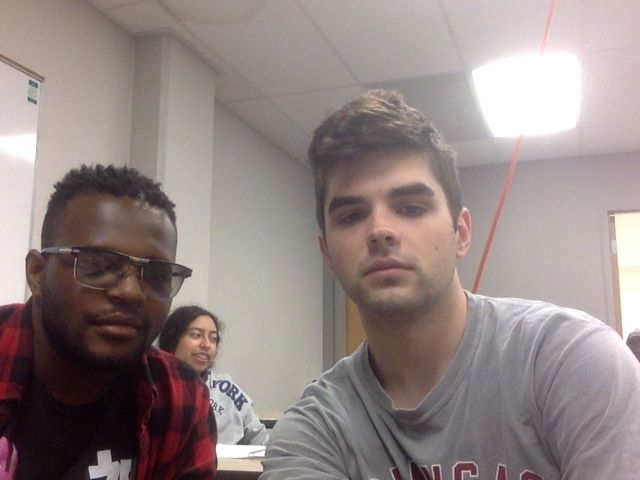

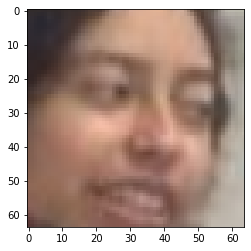

Top 3 Predictions: ['Maria', 'Steve', 'Alejandra']
Top 3 Confidence: [0.56823677, 0.083671615, 0.06664597]


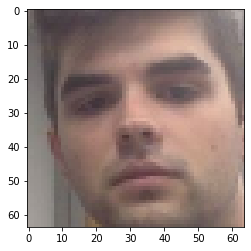

Top 3 Predictions: ['Sam', 'Jose', 'Wren']
Top 3 Confidence: [0.31085908, 0.13158958, 0.12782522]


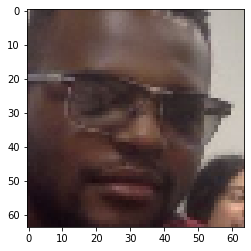

Top 3 Predictions: ['Wren', 'Maria', 'Lizbet']
Top 3 Confidence: [0.8274211, 0.10361344, 0.02863083]


In [ ]:
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  im = cv.imread('photo.jpg')
  faces = crop_to_face(fixImg(im, rotate=False))

  predictions = model.predict(np.array(faces))
  for face_idx, face in enumerate(faces):
    # Show the faces in the image.
    plt.imshow(face)
    plt.show()
    # Print predictions
    print('Top 3 Predictions:', [classmates[_] for _ in predictions[face_idx].argsort()[-3:][::-1]])
    print('Top 3 Confidence:', sorted(predictions[face_idx])[-3:][::-1])
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Tweaking the Model

---

##Preprocessing

In our testing, the model performs pretty well on the testing data, but when fed an image, if often misidentifies the person in the image. Let's tweak our model and see if we can produce some better results.

In [ ]:
# Helper functions
def fixImg(img, rotate = True):
  img = img[:,:,::-1] # Color correction
  if rotate:
    img = cv.rotate(img, cv.cv2.ROTATE_90_CLOCKWISE) # Rotation
  return img

def crop_to_face(img):
    face_locations = face_recognition.face_locations(img)
    output_imgs = []
    for face_location in face_locations:
        top, right, bottom, left = face_location
        new_img = img[top:bottom,left:right,:] # Cropping
        new_img = cv.resize(new_img, (64,64)) # Resizing
        output_imgs.append(new_img)
    return output_imgs

# Mount to google drive
drive.mount('/content/drive')

# Create an array with all the video filepaths
path='drive/MyDrive/data/'
videos = []
for file in os.listdir(path):
    video = path + file
    videos.append(video)

# Create feature array full of images
X_train = []
y_train = []
X_test = []
y_test = []
for student_idx, video in enumerate(videos):
  input_video = cv.VideoCapture(video)

  height = int(input_video.get(cv.CAP_PROP_FRAME_HEIGHT))
  width = int(input_video.get(cv.CAP_PROP_FRAME_WIDTH))
  fps = input_video.get(cv.CAP_PROP_FPS)
  total_frames = int(input_video.get(cv.CAP_PROP_FRAME_COUNT))

  for frame_idx in range(0, 140, 5):
    input_video.set(cv.CAP_PROP_POS_FRAMES, frame_idx)
    ret, frame = input_video.read()
    if not ret:
      raise Exception("Problem reading frame", frame_idx, " from video")
    faces = crop_to_face(fixImg(frame))
    if len(faces) == 1: # Only use a frame if there is exactly 1 face detected
      if frame_idx % 5 == 0:
        X_test.append(faces[0])
        y_test.append(student_idx)
      else:
        X_train.append(faces[0])
        y_train.append(student_idx)
  print(student_idx)
  input_video.release()

X_train = np.array(X_train)
y_train = np.array([[0] * _ + [1] + [0] * (21 - _ - 1)  for _ in y_train])
X_test = np.array(X_test)
y_test = np.array([[0] * _ + [1] + [0] * (21 - _ - 1) for _ in y_test])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


##Model from Paper

This model is from https://github.com/comratvlad/sv_softmax/blob/master/notebooks/SVsoftmax_cifar100.ipynb

In [ ]:
model = models.Sequential()

model.add(layers.Convolution2D(32, 3, padding='same',
                               input_shape=(64, 64, 3)))
model.add(layers.Activation('relu'))
model.add(layers.Convolution2D(32, 3))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Convolution2D(64, 3, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Convolution2D(64, 3))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(21))
model.add(layers.Activation('softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_softmax = model.fit(X_train, y_train, 
              batch_size=128, epochs=50, verbose=1,
              validation_data=(X_test, y_test));

# Calling `save('my_model')` creates a SavedModel folder `my_model`.
model.save("drive/MyDrive/my_model")

##Load saved model from file

In [ ]:
# It can be used to reconstruct the model identically.
model = keras.models.load_model("drive/MyDrive/my_model")

##Testing

Let's see how that model performs

17/17 [==============================] - 30s 12ms/step - loss: 0.0351 - accuracy: 0.9907


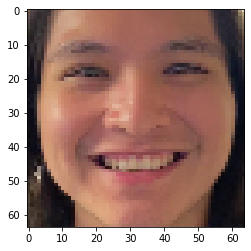

Prediction: Greg
Actual: Greg

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.92      0.96        26
           2       1.00      1.00      1.00        27
           3       0.95      1.00      0.98        20
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        14
           6       0.97      1.00      0.98        28
           7       0.96      1.00      0.98        27
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        27
          10       1.00      0.96      0.98        23
          11       0.96      1.00      0.98        27
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        28
          14       1.00      0.96      0.98        28
          15       1.00      1.00      1.00        24
          16       1.00    

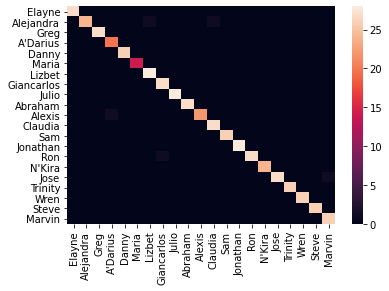

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

num = random.randint(0, len(y_test)-1)

plt.imshow(X_test[num])
plt.show()
predictions = model.predict(X_test)
rounded_predictions = np.argmax(predictions, axis=1)
rounded_labels = np.argmax(y_test, axis=1)
classmates = ['Elayne', 'Alejandra', 'Greg', "A'Darius", 'Danny', 'Maria', 
          'Lizbet', 'Giancarlos', 'Julio', 'Abraham', 'Alexis', 'Claudia', 
          'Sam', 'Jonathan', 'Ron', "N'Kira", 'Jose', 'Trinity', 'Wren', 
          'Steve', 'Marvin']
print('Prediction:', classmates[rounded_predictions[num]])
print('Actual:', classmates[rounded_labels[num]])

print('\nclassification report:')
print(classification_report(rounded_labels, rounded_predictions))

print('confusion matrix:')
cm = confusion_matrix(rounded_labels, rounded_predictions)
sns.heatmap(cm, xticklabels=classmates, yticklabels=classmates)

Yikes, not that great. Maybe that means that this model will generalize better than the last one. Let's try taking photos with a webcam again.

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  print(data)
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>


Image data of dtype |S22511 cannot be converted to float

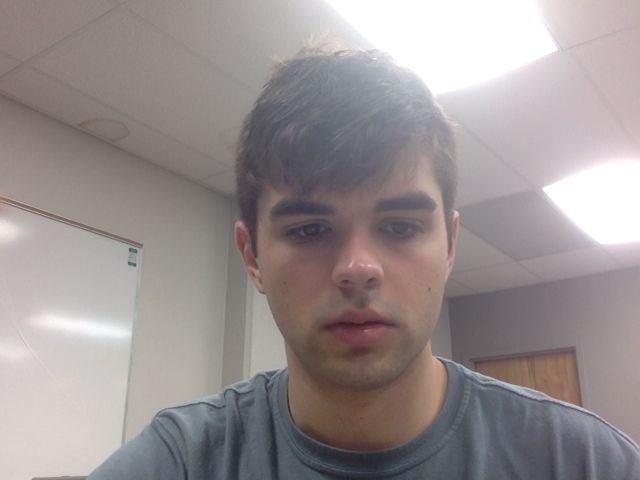

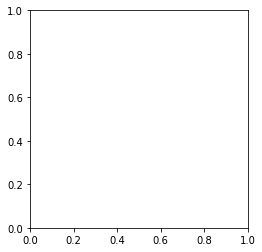

In [ ]:
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  im = cv.imread('photo.jpg')
  faces = crop_to_face(fixImg(im, rotate=False))

  predictions = model.predict(np.array(faces))
  for face_idx, face in enumerate(faces):
    # Show the faces in the image.
    plt.imshow(face)
    plt.show()
    # Print predictions
    print('Top 3 Predictions:', [classmates[_] for _ in predictions[face_idx].argsort()[-3:][::-1]])
    print('Top 3 Confidence:', sorted(predictions[face_idx])[-3:][::-1])
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

#Live Webcam Demo

---

The Webcam Demo will be a cool part of our presentation, but ideally we'd like to be able to make predictions live from the webcam feed, instead of requiring the user to snap individual pictures. https://towardsdatascience.com/real-time-face-recognition-an-end-to-end-project-b738bb0f7348


Colab is run on external hardware, so it's a bit finnicky to access the local webcam. As such, we decided to code this demo on a local file. However, we've attatched a video of it working below.

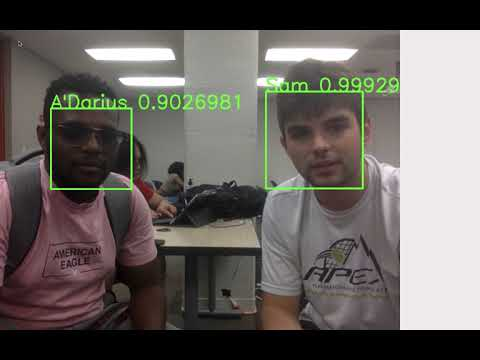

In [ ]:
YouTubeVideo('JjnOHrKXrag')

#Collecting More Data

---

Our model is a little bit scuffed in the live webcam demo, so we're going to try collecting a bigger, more diverse dataset in hopes of building a more robust model. For now, we're going to simply the process by having only four classes.

##Preprocessing

In [ ]:
classmates = ["A'Darius", 'Alejandra', 'Claudia', 'Sam']

     |████████████████████████████████| 100.1 MB 24 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=201f1ffdad07bbad7600ae1f4ff372edc0c26720ca6fbe65a6f671bc610be46d
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


Here I'm loading the data frome one video source and saving it to a foledr

In [ ]:
# Helper functions
def fixImg(img, rotate = True):
  img = img[:,:,::-1] # Color correction
  if rotate:
    img = cv.rotate(img, cv.cv2.ROTATE_90_CLOCKWISE) # Rotation
  return img

def crop_to_face(img):
    face_locations = face_recognition.face_locations(img)
    output_imgs = []
    for face_location in face_locations:
        top, right, bottom, left = face_location
        new_img = img[top:bottom,left:right,:] # Cropping
        new_img = cv.resize(new_img, (64,64)) # Resizing
        output_imgs.append(new_img)
    return output_imgs

# Mount to google drive
drive.mount('/content/drive')

# Create an array with all the video filepaths
path='drive/MyDrive/data2/'
videos = []
for file in sorted(os.listdir(path)):
    video = path + file
    videos.append(video)
print(videos)

# Create feature array full of images
X_train = []
y_train = []
X_test = []
y_test = []
for student_idx, video in enumerate(videos):
  input_video = cv.VideoCapture(video)

  height = int(input_video.get(cv.CAP_PROP_FRAME_HEIGHT))
  width = int(input_video.get(cv.CAP_PROP_FRAME_WIDTH))
  fps = input_video.get(cv.CAP_PROP_FPS)
  total_frames = int(input_video.get(cv.CAP_PROP_FRAME_COUNT))

  successful_frames = 0
  for frame_idx in range(0, total_frames, 1):
    # Also we're capping out the number of frames per person at 200
    if successful_frames > 200:
      break
    input_video.set(cv.CAP_PROP_POS_FRAMES, frame_idx)
    ret, frame = input_video.read()
    if not ret:
      raise Exception("Problem reading frame", frame_idx, " from video")
    faces = crop_to_face(fixImg(frame, rotate = False))
    if len(faces) == 1: # Only use a frame if there is exactly 1 face detected
      successful_frames += 1
      if frame_idx % 5 == 0:
        X_test.append(faces[0])
        y_test.append(student_idx)
      else:
        X_train.append(faces[0])
        y_train.append(student_idx)
  print(student_idx)
  input_video.release()

X_train = np.array(X_train, dtype=np.float64)
y_train = np.array([[0] * _ + [1] + [0] * (4 - _ - 1)  for _ in y_train]) # One hot
X_test = np.array(X_test, dtype=np.float64)
y_test = np.array([[0] * _ + [1] + [0] * (4 - _ - 1) for _ in y_test]) # One hot

for idx, image in enumerate(X_train):
  try:
    os.mkdir('drive/MyDrive/capstone/train/' + classmates[np.argmax(y_train[idx])])
  except OSError as error: 
    pass
  cv.imwrite('drive/MyDrive/capstone/train/' + classmates[np.argmax(y_train[idx])] + '/' + str(idx) + '.jpg', image)

for idx, image in enumerate(X_test):
  try:
    os.mkdir('drive/MyDrive/capstone/test/' + classmates[np.argmax(y_test[idx])])
  except OSError as error: 
    pass
  cv.imwrite('drive/MyDrive/capstone/test/' + classmates[np.argmax(y_test[idx])] + '/' + str(idx) + '.jpg', image)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['drive/MyDrive/data2/adarius.mov', 'drive/MyDrive/data2/alejandra.mov', 'drive/MyDrive/data2/claudia.mov', 'drive/MyDrive/data2/sam.mov']
0
1
2
3


Here I'm going to load the other videos taken in the classroom for the four classes represented here and save the images

In [ ]:
# Create an array with all the video filepaths
path='drive/MyDrive/data3/'
videos = []
for file in sorted(os.listdir(path)):
    video = path + file
    videos.append(video)
print(videos)

# Create feature array full of images
X_train = []
y_train = []
X_test = []
y_test = []
for student_idx, video in enumerate(videos):
  input_video = cv.VideoCapture(video)

  height = int(input_video.get(cv.CAP_PROP_FRAME_HEIGHT))
  width = int(input_video.get(cv.CAP_PROP_FRAME_WIDTH))
  fps = input_video.get(cv.CAP_PROP_FPS)
  total_frames = int(input_video.get(cv.CAP_PROP_FRAME_COUNT))

  successful_frames = 0
  for frame_idx in range(0, total_frames, 1):
    # Also we're capping out the number of frames per person at 80
    if successful_frames > 80:
      break
    input_video.set(cv.CAP_PROP_POS_FRAMES, frame_idx)
    ret, frame = input_video.read()
    if not ret:
      raise Exception("Problem reading frame", frame_idx, " from video")
    faces = crop_to_face(fixImg(frame, rotate = True))
    if len(faces) == 1: # Only use a frame if there is exactly 1 face detected
      successful_frames += 1
      if frame_idx % 5 == 0:
        X_test.append(faces[0])
        y_test.append(student_idx)
      else:
        X_train.append(faces[0])
        y_train.append(student_idx)
  print(student_idx)
  input_video.release()

X_train = np.array(X_train, dtype=np.float64)

y_train = np.array([[0] * _ + [1] + [0] * (4 - _ - 1)  for _ in y_train]) # One hot
X_test = np.array(X_test, dtype=np.float64)
y_test = np.array([[0] * _ + [1] + [0] * (4 - _ - 1) for _ in y_test]) # One hot

for idx, image in enumerate(X_train):
  try:
    os.mkdir('drive/MyDrive/capstone/train/' + classmates[np.argmax(y_train[idx])])
  except OSError as error: 
    pass
  cv.imwrite('drive/MyDrive/capstone/train/' + classmates[np.argmax(y_train[idx])] + '/' + str(idx) + 'b.jpg', image)

for idx, image in enumerate(X_test):
  try:
    os.mkdir('drive/MyDrive/capstone/test/' + classmates[np.argmax(y_test[idx])])
  except OSError as error: 
    pass
  cv.imwrite('drive/MyDrive/capstone/test/' + classmates[np.argmax(y_test[idx])] + '/' + str(idx) + 'b.jpg', image)

['drive/MyDrive/data3/adarius.MOV', 'drive/MyDrive/data3/alejandra.MOV', 'drive/MyDrive/data3/claudia.MOV', 'drive/MyDrive/data3/sam.MOV']
0
1
2
3


And this code block is for loading the data from image these files

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

X_train = []
y_train = []
X_test = []
y_test = []
for classmate_idx, classmate in enumerate(classmates):
  train_add = load_images_from_folder('drive/MyDrive/capstone/train/' + classmate)
  test_add = load_images_from_folder('drive/MyDrive/capstone/test/' + classmate)
  if len(X_train) == 0:
    X_train = train_add
  else:
    X_train = np.concatenate((X_train, train_add))
  if len(X_test) == 0:
    X_test = test_add
  else:
    X_test = np.concatenate((X_test, test_add))
  
  for _ in range(len(train_add)):
    y_train.append(classmate_idx)
  
  for _ in range(len(test_add)):
    y_test.append(classmate_idx)

X_train = np.array(X_train)
y_train = np.array([[0] * _ + [1] + [0] * (4 - _ - 1)  for _ in y_train])
X_test = np.array(X_test)
y_test = np.array([[0] * _ + [1] + [0] * (4 - _ - 1) for _ in y_test])

Normalization per request of Kashu

In [ ]:
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()
print(X_train.mean())
print(X_train.std())

9.992007221626409e-17
1.0000000000000009


##Model

In [ ]:
model = models.Sequential()

model.add(layers.Convolution2D(32, 3, padding='same',
                               input_shape=(64, 64, 3)))
model.add(layers.Activation('relu'))
model.add(layers.Convolution2D(32, 3))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Convolution2D(64, 3, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Convolution2D(64, 3))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4))
model.add(layers.Activation('softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_softmax = model.fit(X_train, y_train, 
              batch_size=128, epochs=8, verbose=1,
              validation_data=(X_test, y_test));

# Calling `save('my_model')` creates a SavedModel folder `my_model`.
model.save("drive/MyDrive/my_model_2")

Epoch 1/8
8/8 [==============================] - 2s 87ms/step - loss: 1.7138 - accuracy: 0.3544 - val_loss: 1.0659 - val_accuracy: 0.6974
Epoch 2/8
8/8 [==============================] - 0s 22ms/step - loss: 0.8030 - accuracy: 0.7107 - val_loss: 0.2555 - val_accuracy: 0.9167
Epoch 3/8
8/8 [==============================] - 0s 24ms/step - loss: 0.2045 - accuracy: 0.9202 - val_loss: 0.0540 - val_accuracy: 0.9825
Epoch 4/8
8/8 [==============================] - 0s 21ms/step - loss: 0.0754 - accuracy: 0.9671 - val_loss: 0.0694 - val_accuracy: 0.9912
Epoch 5/8
8/8 [==============================] - 0s 22ms/step - loss: 0.0412 - accuracy: 0.9868 - val_loss: 0.0893 - val_accuracy: 0.9868
Epoch 6/8
8/8 [==============================] - 0s 23ms/step - loss: 0.0285 - accuracy: 0.9928 - val_loss: 0.0414 - val_accuracy: 0.9912
Epoch 7/8
8/8 [==============================] - 0s 23ms/step - loss: 0.0416 - accuracy: 0.9811 - val_loss: 0.1490 - val_accuracy: 0.9561
Epoch 8/8
8/8 [===================

##Loading saved model from file

In [ ]:
# It can be used to reconstruct the model identically.
model = keras.models.load_model("drive/MyDrive/my_model_2")

##Testing

8/8 [==============================] - 15s 10ms/step - loss: 0.1508 - accuracy: 0.9737


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


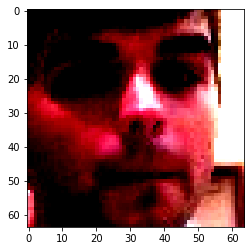

Prediction: Sam
Actual: Sam

classification report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        58
           1       0.91      1.00      0.95        58
           2       1.00      0.98      0.99        58
           3       1.00      1.00      1.00        54

    accuracy                           0.97       228
   macro avg       0.98      0.97      0.97       228
weighted avg       0.98      0.97      0.97       228

confusion matrix:


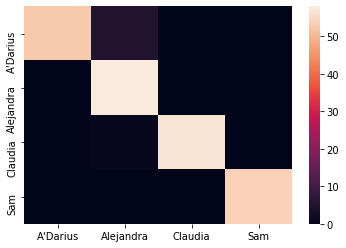

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

num = random.randint(0, len(y_test)-1)

plt.imshow(X_test[num])
plt.show()
predictions = model.predict(X_test)
rounded_predictions = np.argmax(predictions, axis=1)
rounded_labels = np.argmax(y_test, axis=1)
print('Prediction:', classmates[rounded_predictions[num]])
print('Actual:', classmates[rounded_labels[num]])

print('\nclassification report:')
print(classification_report(rounded_labels, rounded_predictions))

print('confusion matrix:')
cm = confusion_matrix(rounded_labels, rounded_predictions)
sns.heatmap(cm, xticklabels=classmates, yticklabels=classmates)

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  print(data)
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  im = cv.imread('photo.jpg')
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  faces = crop_to_face(fixImg(im, rotate=False))
  faces = (faces - faces.mean()) / faces.std()
  predictions = model.predict(np.array(faces))
  for face_idx, face in enumerate(faces):
    # Show the faces in the image.
    face = cv2.cvtColor(face, cv2.RGB2BGR)
    plt.imshow(face)
    plt.show()
    # Print predictions
    print('Top 3 Predictions:', [classmates[_] for _ in predictions[face_idx].argsort()[-3:][::-1]])
    print('Top 3 Confidence:', sorted(predictions[face_idx])[-3:][::-1])
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

name 'take_photo' is not defined


#Facial Encoding

---

This model actually performs pretty well. But we want to have something a little more reliable for our demo on presentation day. To do this, we're going to use facial encoding with the facial_recognition library. The demo for this was coded locally so that we could easily access the webcam, but a recording is attatched below of the finished product.

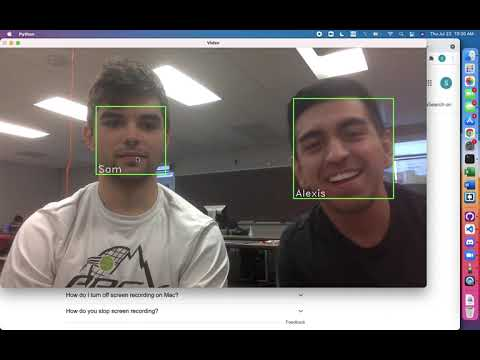

In [ ]:
YouTubeVideo('ba2BcO_Grek')